In [2]:
# In this line , We have imported all the packages that will be required further.
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import os
import cv2
from scipy import ndimage, misc
from sklearn.datasets import fetch_mldata
from PIL import Image

In [14]:
# This is about getting the current directory path. 
# So, we are not required to chnage the path for dataset. It will automatically take the path for dataset.
path = os.getcwd() + "\\dataset-(u_n_U_200_100)"

In [18]:
# In this line of code, It will read the Images file from dataset and will resize each image file.
# For resizing the image file, we are considering converting to 784 pixels each file, so that we can reduce the computation time.
images = []
for root, dirnames, filenames in os.walk(path):
    for filename in filenames:
        filepath = os.path.join(root, filename)
        image = ndimage.imread(filepath, mode="1")
        image_resized = misc.imresize(image, (28,28))
        image_resized = np.reshape(image_resized, (np.product(image_resized.shape)))
        images.append(image_resized) 

C:\Users\asus\Anaconda3\Lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  """
C:\Users\asus\Anaconda3\Lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


In [19]:
# To check the image size
images[1].shape

(784,)

In [26]:
# For counting total number of Images in Folder
count = 0
for i in images:
    count+=1

In [27]:
count

300

In [28]:
# TO storing the images pixels in a list and then converting the list into array.
Xlist=[]
for i in range(count):
    Xlist.append(list(np.asarray(images[i])))

In [29]:
X = np.asarray(Xlist)

In [32]:
# It will automatically read the path of CSV file.
csv_path = os.getcwd() +"\\U_n_U_200_100.csv"
csv = pd.read_csv(csv_path)

In [33]:
# It will take each image file's label(USF / Non USF) and store into a List.
y = []
for i in range(count):
    x =csv['Label'][i]
    y.append(x)

In [34]:
# It will convert the list into array.
y = np.asarray(y)

In [35]:
# To check the type of X and Y.
type(X),type(y)

(numpy.ndarray, numpy.ndarray)

In [36]:
# To check the shape of X & Y.
X.shape,y.shape

((300, 784), (300,))

In [608]:
# To divide the dataset into train and test.
# For testing we have taken 20% of data.
test  = int(count*0.2)
test

60

In [609]:
# Dividing the original dataset into training and testing datset.
X_train, X_test, y_train, y_test = X[:count-test], X[count-test:],y[:count-test], y[count-test:]

In [610]:
type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [611]:
X_train.shape,y_train.shape

((240, 784), (240,))

In [612]:
# For shuffling index of train dataset.
shuffle_index = np.random.permutation(count-test)

In [613]:
# Printing shuffle index, length of it and each and every shufle index.
print(type(shuffle_index), len(shuffle_index),shuffle_index)

<class 'numpy.ndarray'> 240 [ 55 156 206  77  87 200  78 117  47 108  10 218 145 236  41  36 101  45
 221  58 194  17  37  98  32 129  91 208   6 178 237  72  25  82  12 126
 105 222 131 190 187  16 225  31 215 118 103 196  65   0 193  30  73  69
  89 216 164 132  63  67  39 198 186  57  11 166   5  75  93 149 133   9
 235 128 175   3 154  60  97   4 144 188 223 184 135 217  42 172  74 142
  83  38 182 219  23 140 115 109 122 191 100  54 204  81  53 112 124  46
 224  27  96 195 127  52  20 173  22  48 183 176  19 202   1 233 213   8
  50 143  29 147 207 138  79  90 130 168 146  94 201  34 212  68 136 239
 234  64 220  44  61  15 169  92 116 232 157  35 125 197 179 167 114 162
   2 170  43  24 106 161 137 139 229  71 211 107  18 210   7 209 123  80
 171 155 134  40  33 238  62 153 104 111  13 230 228 121 227  84 159 120
 174 163 148  21  86 113  51  95 152 158  66 151 160 141 189  70 185 150
  85  14 199  76 205  99 110 180  28 102  59 214  49 192 181  26 165 231
  88 177 226 203  56 11

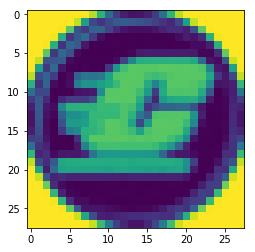

In [614]:
# For showing a single imgae file after reshaping.
some_digit = X_train[0]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image)
plt.show()

In [615]:
# For shuffling X_Train and Y_Train.
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [616]:
# For importing creating Stochastic Gradient Descent.
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(random_state=42)
type(sgd)

sklearn.linear_model.stochastic_gradient.SGDClassifier

In [617]:
# Trying to fit the data with the sgd model and predicting using X_test data..
sgd.fit(X_train, y_train)
prediction = sgd.predict(X_test)

C:\Users\asus\Anaconda3\Lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [618]:
# importing accuracy score
from sklearn.metrics import accuracy_score

In [619]:
# For getting the accuracy from the model.
total =0
total = accuracy_score(y_test, prediction)
print(total)

In [620]:
print(total)

0.6666666666666666


In [538]:
# For importing cross validation score
from sklearn.model_selection import cross_val_score

In [539]:
# For calculating cross val score by giving CV=3.
cross_val_score(sgd, X_train, y_train, cv=3, scoring="accuracy")

C:\Users\asus\Anaconda3\Lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\asus\Anaconda3\Lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\asus\Anaconda3\Lib\site-p

array([0.58024691, 0.6875    , 0.73417722])

In [508]:
# For importing cross validation prediction.
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd, X_train, y_train, cv=3)

C:\Users\asus\Anaconda3\Lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\asus\Anaconda3\Lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\asus\Anaconda3\Lib\site-p

In [509]:
len(y_train_pred)

240

In [510]:
# For importing  confusion matrix and creating confusion matrix.
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred) # actual vs predicted

array([[ 60,  32],
       [ 36, 112]], dtype=int64)